In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../Data/Train.txt", names=column_names)

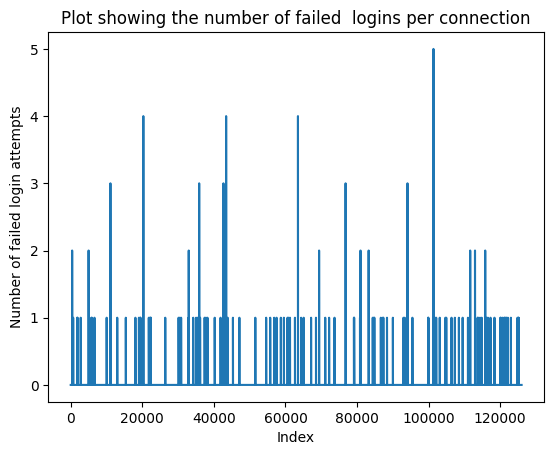

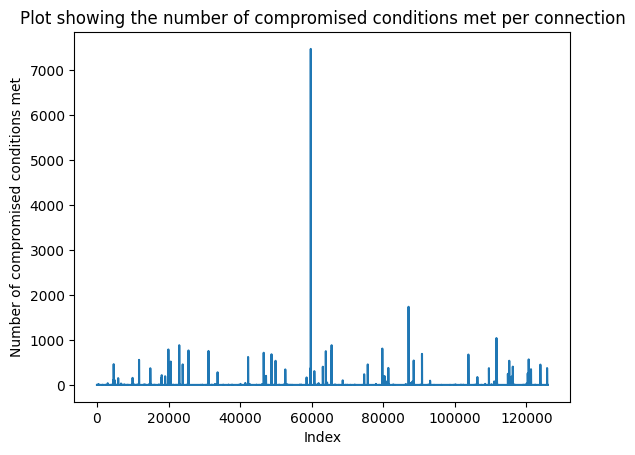

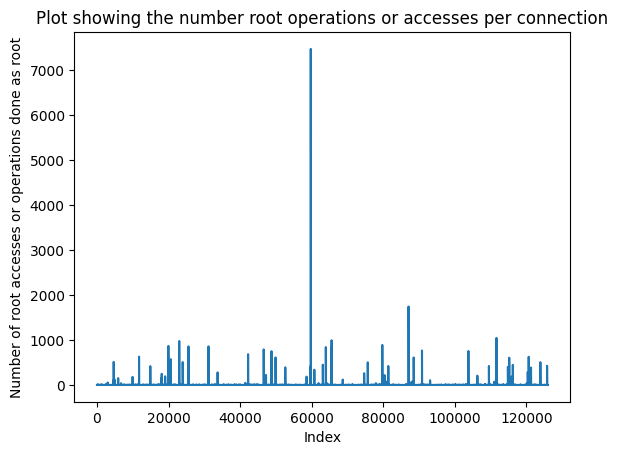

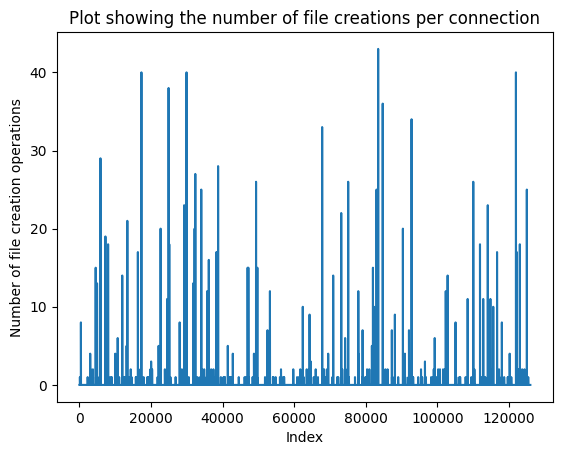

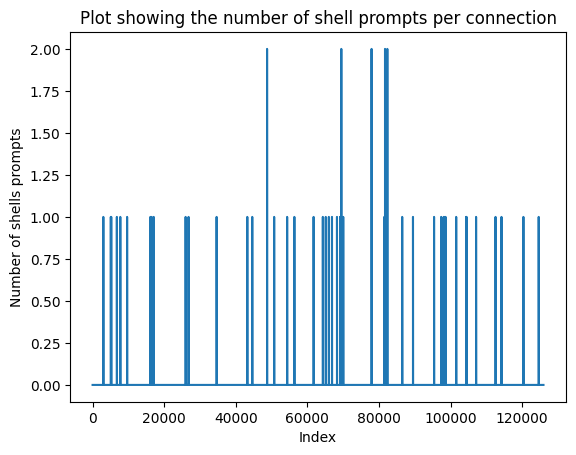

In [2]:
def general_plot(column, xlabel, ylabel, title):
    plt.plot(dataset[column])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    plt.show()
    
# Content related features of each Network connection vector
general_plot("num_failed_logins", "Index", "Number of failed login attempts",  "Plot showing the number of failed  logins per connection")
general_plot("num_compromised", "Index", "Number of compromised conditions met",  "Plot showing the number of compromised conditions met per connection")
general_plot("num_root", "Index", "Number of root accesses or operations done as root",  "Plot showing the number root operations or accesses per connection")
general_plot("num_file_creations", "Index", "Number of file creation operations",  "Plot showing the number of file creations per connection")
general_plot("num_shells", "Index", "Number of shells prompts",  "Plot showing the number of shell prompts per connection")

In [7]:
# Investigating the row content of those with the number of failed logins over 3
print("Greater than one, failed login attempts") # hypothesis could indicate attack, inverse thus does not indicate an attack
print(dataset[dataset["num_failed_logins"] > 3]) # shows two normal but two attacks (for greater than 4 just guess attack) (could be a good indicator but not enough alone, perhaps use with 'last_flag')

# Investigating the row content of those with the number of compromised conditions met over 1000
print("Greater than a thousand, number of compromised conditions met") # hypothesis excessive conditions met indicate an attack
print(dataset[dataset["num_compromised"] > 1000]) # A high value does not correlate to an attack

# Investigating the row content of those with a number of root usage over a 1000
print("Greater than a thousand, number of root accesses or operations") # hypothesis excessive root usage may indicate an attack
print(dataset[dataset["num_root"] > 1000]) # A high value does not correlate to an attack

# Investigating the row content of those with a number of file creations over 1000
print("Greater than thirty, number of file creation operations") # hypothesis excessive file creations may indicate a staging for an attack
print(dataset[dataset["num_file_creations"] > 30]) # A high value does not correlate to an attack


# Investigating the row content of those with number of shell prompts over 1
print("Greater than one, number of shells") # hypothesis excessive shell connections could indicate an attack
print(dataset[dataset["num_shells"] > 1]) # for greater than one shows three attacks and two normal (not enough alone but can be a good indicator (maybe good with 'dst_host_same_src_port_rate', as for the attacks it had 1.0 with the normal being significantly lower)))

Greater than one, failed login attempts
        duration protocol_type service flag  src_bytes  dst_bytes  land  \
20295          0           tcp     ftp   SF        103        292     0   
43426        143           tcp  telnet   SF        142        324     0   
63490         13           tcp  telnet   SF        246      11938     0   
101346        23           tcp  telnet   SF        104        276     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
20295                0       0    1  ...                    0.02   
43426                0       0    0  ...                    0.12   
63490                0       0    0  ...                    0.02   
101346               0       0    0  ...                    1.00   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
20295                     0.11                         0.01   
43426                     0.38                         0.00   
63490                     0.04                        